In [1]:
from api_core_functions import query_pubmed, query_ctgov_study, query_twitter_archive_for_numbers, query_ctgov_field
from ctgov_product_query import query_ctgov_trials_detail_for_productlist, query_ctgov_normalization_detail_dataset, query_daily_study_count_for_productlist, query_daily_study_count, query_monthly_ctgov_combination_result, query_monthly_study_count_for_productlist
from multi_query import Multiquery
import pandas as pd
from time import sleep
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib import pyplot as plt 
import seaborn as sns; sns.set()
import plotly.io as pio


### Load Data

In [2]:
product_df = pd.read_excel("PRODUCTS.xlsx")
product_list = product_df.PRODUCT.tolist()
#complete_df = query_ctgov_trials_detail_for_productlist(product_list)

In [3]:
complete_df = query_daily_study_count_for_productlist(product_list, drop_duplicates = True, detailed = True )

Now querying for 10s AND fork
Now querying for 7000a AND finger AND probe 
Now querying for accucheck
Now querying for accu AND check
Now querying for accuchek
Now querying for accu AND chek
Now querying for accugait
Now querying for accupedo
Now querying for achillex
Now querying for actical
Now querying for actigraph
Now querying for actiheart
Now querying for actisleep
Now querying for actitrac
Now querying for activepal
Now querying for activepers
Now querying for activity AND monitor AND comparison
Now querying for activpal
Now querying for actiware
Now querying for actiwatch
Now querying for actiwatch AND spectrum
Now querying for actiwatch AND 64
Now querying for actofit
Now querying for actofit AND smartscale
Now querying for adamm
Now querying for adherium
Now querying for adidas AND zone
Now querying for adis16400bmlz
Now querying for adlcare
Now querying for adxl AND 335
Now querying for adxl105jqc
Now querying for adxl330
Now querying for adxl345
Now querying for adxl346
No

In [3]:
#Use this code for  more detailed df, which unfortunately caps the actigraph trials at 1000 /compared to more than 1200
# complete_df = query_daily_study_count_for_productlist(product_list, drop_duplicates = True, detailed = True )

Now querying for 10s AND fork
Now querying for 7000a AND finger AND probe AND 
HTTP Error 400: Bad Request
Now querying for accucheck


KeyboardInterrupt: 

In [4]:
complete_df.to_csv("Data/Ctgov_Prodcut_List_daily_without_detail_full.csv", index=False)
#use Ctgov_Prodcut_List_daily for detailed one

In [2]:
complete_df = pd.read_csv("Data/Ctgov_Prodcut_List_df_without_detail_full.csv")

In [6]:
complete_df["StartDate"] = pd.to_datetime(
    complete_df["StartDate"], infer_datetime_format=True
)

In [16]:
complete_df = complete_df[~(complete_df['StartDate'] < '2000-01-01')]
complete_df = complete_df[~(complete_df['StartDate'] > '2022-10-01')]

In [17]:
search_terms = complete_df.search_term.value_counts()

### Monthly Summary

In [7]:
monthly_df = complete_df.groupby(pd.Grouper(key="StartDate", axis=0, freq="M")).agg('count')
monthly_df.reset_index(inplace=True)
monthly_df = monthly_df[["StartDate", "NCTId"]]
monthly_df.rename(columns={"StartDate": "month", "NCTId": "trial_count"}, inplace = True)
monthly_df["month"] = monthly_df['month'].dt.normalize()
monthly_df.to_csv("Data/CTGov_PR_Monthly_DHT_df.csv", index=False)


In [8]:
monthly_df = monthly_df[~(monthly_df['month'] < '2000-01-01')]
monthly_df = monthly_df[~(monthly_df['month'] > '2022-10-01')]

monthly_df.reset_index(inplace=True, drop=True)


##### Query reference dataset

In [2]:
ref_df = pd.read_csv("https://www.clinicaltrials.gov/api/query/field_values?expr=ALL&field=StartDate&fmt=csv", skiprows =13).drop(labels="Index", axis=1)
ref_df["FieldValue"] = pd.to_datetime(
    ref_df["FieldValue"], infer_datetime_format=True
)

In [3]:
group = ref_df['FieldValue'].dt.to_period('M')


monthly_ref_df= ref_df.groupby([group]).agg('sum').reset_index()

In [4]:
monthly_ref_df = ref_df.groupby(pd.Grouper(key="FieldValue", freq="M")).sum()
monthly_ref_df.drop("NStudiesWithValue", axis = 1, inplace = True)
monthly_ref_df.reset_index(inplace = True)
monthly_ref_df.rename(columns={"FieldValue": "month", "NStudiesFoundWithValue": "trial_count"}, inplace = True)
monthly_ref_df["month"] = monthly_ref_df['month'].dt.normalize()
#monthly_ref_df.to_csv("Data/CTGov_PR_Monthly_REF_DHT_df.csv", index=False)


In [12]:
monthly_ref_df = pd.read_csv("Data/CTGov_PR_Monthly_REF_DHT_df.csv")

In [5]:
monthly_ref_df = monthly_ref_df[~(monthly_ref_df['month'] < '2000-01-01')]
monthly_ref_df = monthly_ref_df[~(monthly_ref_df['month'] > '2022-10-01')]
monthly_ref_df.reset_index(inplace=True, drop=True)

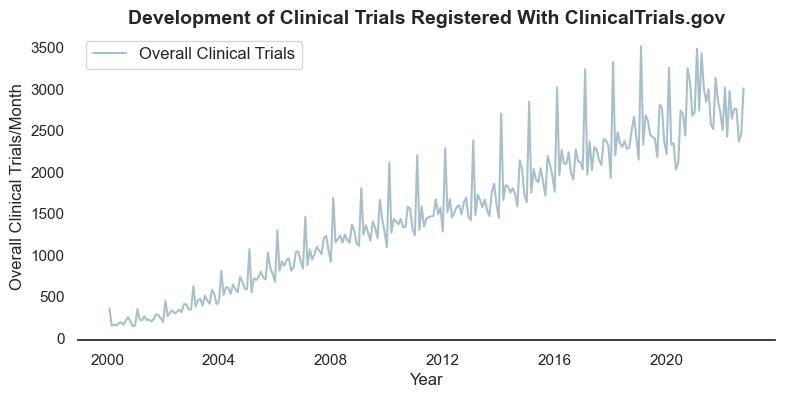

In [9]:
fig = plt.figure(figsize=(9,4))
sns.set_theme(style="white")
ax = fig.add_subplot(111)

fig1 = sns.lineplot(ax = ax, x = monthly_ref_df.month, y= monthly_ref_df.trial_count,   
                    color ="#A8C0CB")
ax.legend(["Overall Clinical Trials"], fontsize = "medium")
handles1=  ax.get_legend().legendHandles
plt.ylabel("Overall Clinical Trials/Month")
plt.xlabel("Year")
sns.despine(left = True)




plt.title("Development of Clinical Trials Registered With ClinicalTrials.gov",  fontsize = 14, fontweight = "bold")
#plt.xticks([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])

plt.savefig('Graphs/CTGov_Overall_Trials.tiff', dpi = 600, bbox_inches = 'tight')

plt.show()

In [13]:
monthly_df["reference_total_trial_count"] = monthly_ref_df.trial_count
monthly_df["DHT_trial_rate"] = monthly_df.trial_count/monthly_df.reference_total_trial_count *100

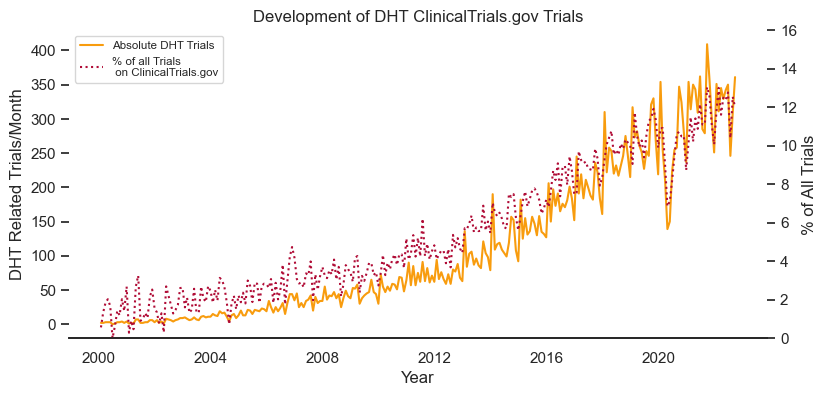

In [15]:
fig = plt.figure(figsize=(9,4))
sns.set_theme(style="white")
ax = fig.add_subplot(111)

fig1 = sns.lineplot(ax = ax, x = monthly_df.month, y= monthly_df.trial_count,   
                    color ="#F89C0E")
ax.legend(["Absolute ClinicalTrials.gov Trials"], fontsize = "x-small")
handles1=  ax.get_legend().legendHandles
ax.get_legend().remove()
plt.ylabel("DHT Related Trials/Month")
plt.xlabel("Year")


ax2 = ax.twinx()
fig2 = sns.lineplot(ax = ax2, x =monthly_df.month , y = monthly_df.DHT_trial_rate, color = "#B00C36", linestyle = "dotted",label = '% of all Trials\n on ClinicalTrials.gov')
handles2,labels2 = ax2.get_legend_handles_labels()
handles = handles1+handles2
labels= ["Absolute DHT Trials", '% of all Trials\n on ClinicalTrials.gov']
ax2.legend(handles, labels,fontsize = "x-small", frameon = True, loc = "upper left")
plt.ylabel("% of All Trials")
plt.ylim(0,16.0)
ax.tick_params(left=True, bottom=False, right = False)
ax2.tick_params(left=False, bottom=False, right = True)
sns.despine(left = True)
plt.title("Development of DHT ClinicalTrials.gov Trials")
#plt.xticks([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])

plt.savefig('Graphs/DHT_CTgov_rate.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/DHT_CTgov_rate.tiff', dpi = 600, bbox_inches = 'tight')


plt.show()

In [23]:
monthly_df.groupby(monthly_df.month.dt.year)["trial_count"].sum()


month
2000      30
2001      43
2002      69
2003     109
2004     157
2005     226
2006     344
2007     397
2008     494
2009     551
2010     695
2011     856
2012     869
2013    1182
2014    1475
2015    1715
2016    2147
2017    2423
2018    2927
2019    3248
2020    3032
2021    3915
2022    2944
Name: trial_count, dtype: int64

In [21]:
a = monthly_df.groupby(monthly_df.month.dt.year)["trial_count"].sum()
b = monthly_ref_df.groupby(monthly_ref_df.month.dt.year)["trial_count"].sum()
a/b

month
2000    0.013118
2001    0.014848
2002    0.016776
2003    0.019289
2004    0.021057
2005    0.024226
2006    0.030421
2007    0.030682
2008    0.033145
2009    0.033885
2010    0.039968
2011    0.046822
2012    0.044986
2013    0.058547
2014    0.065722
2015    0.071218
2016    0.082154
2017    0.088376
2018    0.099772
2019    0.105705
2020    0.095925
2021    0.112772
2022    0.121147
Name: trial_count, dtype: float64